# Car Price Prediction Model
## Algorithm : Linear Regression
### Type : Multiple Linear Regression
## Importing the Dependencies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn import metrics

## Data Gathering 

In [6]:
df = pd.read_csv("car data.csv")

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df.shape

(301, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Data Analysis

#### Checking for Categorical Data

In [11]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [12]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

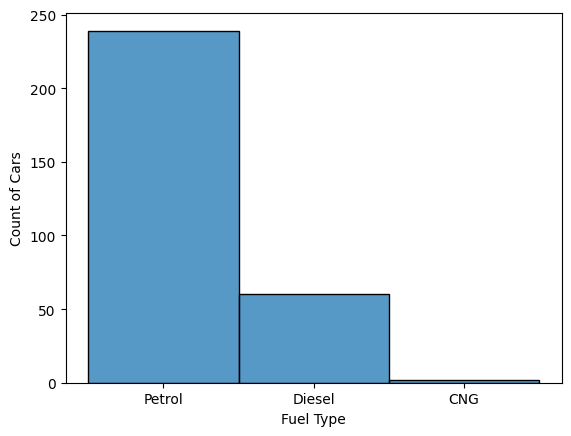

In [13]:
sns.histplot(df["Fuel_Type"])
plt.xlabel("Fuel Type")
plt.ylabel("Count of Cars")
plt.show()

In [14]:
df["Seller_Type"].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [15]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

## Data Preprocessing

#### Encoding the Categorical Data

In [16]:
df.replace({"Fuel_Type":{"Petrol": 1, "Diesel": 2, "CNG": 3}}, inplace=True)
df["Fuel_Type"]

0      1
1      2
2      1
3      1
4      2
      ..
296    2
297    1
298    1
299    2
300    1
Name: Fuel_Type, Length: 301, dtype: int64

In [17]:
df.replace({"Seller_Type":{"Dealer": 1, "Individual": 2}}, inplace=True)
df["Seller_Type"]

0      1
1      1
2      1
3      1
4      1
      ..
296    1
297    1
298    1
299    1
300    1
Name: Seller_Type, Length: 301, dtype: int64

In [18]:
df.replace({"Transmission":{"Manual": 1, "Automatic": 2}}, inplace=True)
df["Transmission"]

0      1
1      1
2      1
3      1
4      1
      ..
296    1
297    1
298    1
299    1
300    1
Name: Transmission, Length: 301, dtype: int64

In [38]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0


## Splitting the Data

In [20]:
X = df.drop(["Car_Name", "Selling_Price"],axis=1)
Y = df["Selling_Price"]

In [21]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,1,1,1,0
1,2013,9.54,43000,2,1,1,0
2,2017,9.85,6900,1,1,1,0
3,2011,4.15,5200,1,1,1,0
4,2014,6.87,42450,2,1,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,2,1,1,0
297,2015,5.90,60000,1,1,1,0
298,2009,11.00,87934,1,1,1,0
299,2017,12.50,9000,2,1,1,0


In [22]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## Train the Model

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.1, random_state =2)
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,1,1,1,0
249,2016,7.600,17000,1,1,1,0
277,2015,13.600,21780,1,1,1,0
194,2008,0.787,50000,1,2,1,0
244,2013,9.400,49000,2,1,1,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,1,1,1,0
22,2011,8.010,50000,1,1,2,0
72,2013,18.610,56001,1,1,1,0
15,2016,10.790,43000,2,1,1,0


In [24]:
X_train.shape

(270, 7)

In [25]:
X_test.shape

(31, 7)

## Data Modelling

In [26]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Test the Model

In [27]:
train_data_pred = model.predict(X_train)

In [28]:
test_data_pred = model.predict(X_test)

## Model Evaluation

#### Training Data Error Score

In [29]:
# R Squared Error
error_score = metrics.r2_score(train_data_pred, Y_train)

In [30]:
error_score = round((error_score * 100),2)

In [31]:
print(f"R Squared Error on Training Data is {error_score}%")

R Squared Error on Training Data is 86.36%


#### Testing Data Error Score

In [32]:
# R Squared Error
error_score = metrics.r2_score(test_data_pred, Y_test)

In [33]:
error_score = round((error_score * 100), 2)

In [34]:
print(f"R Squared Error on Testing Data is {error_score}%")

R Squared Error on Testing Data is 80.62%


#### Actual Prices Vs Predicted Prices

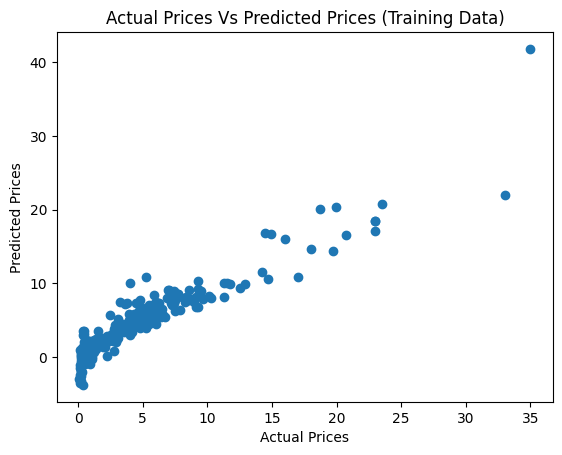

In [35]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices (Training Data)")
plt.show()

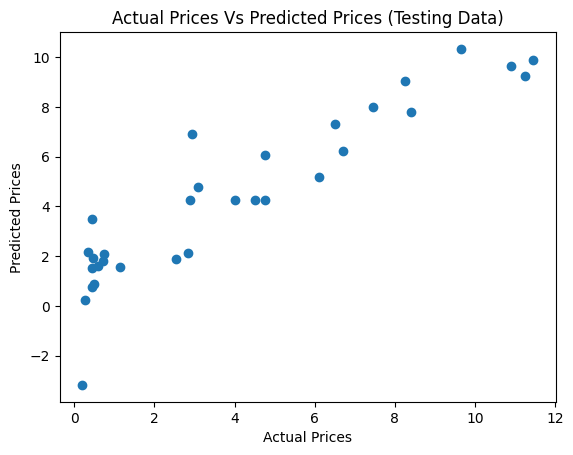

In [36]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices (Testing Data)")
plt.show()

In [37]:
pickle.dump(model, open("Car_Price_Prediction_Using_LinReg", "wb"))